## Aufgabe 17

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 15

In [3]:
# Datensatz aus der Aufgabe
df = pd.DataFrame(
                [[29.4, 2, 85, False, False],
                 [26.7, 2, 90, True, False],
                 [28.3, 1, 78, False, True],
                 [21.1, 0, 96, False, True],
                 [20.0, 0, 80, False, True],
                 [18.3, 0, 70, True, False],
                 [17.8, 1, 65, True, True],
                 [22.2, 2, 95, False, False],
                 [20.6, 2, 70, False, True],
                 [23.9, 0, 80, False, True],
                 [23.9, 2, 70, True, True],
                 [22.2, 1, 90, True, True],
                 [27.2, 1, 75, False, True],
                 [21.7, 0, 80, True, False]],
                 columns=['Temperatur', 'Wettervorhersage', 'Luftfeuchtigkeit', 'Wind', 'Fussball']
                 )

### c)

#### Funktionsdefinitionen

In [4]:
# calculate the probability that the condition occurs
# given that the conditional_condition occurs
# with masks of the dataset as parameters
def P(condition,conditional_condition=None):
    if conditional_condition is None:
        return condition.sum() / condition.size
    else:
        if np.any(conditional_condition):
            return (condition&conditional_condition).sum() / conditional_condition.sum()
        else:
            return 0

In [5]:
def xlog2x(P):
    if P == 0:
        return 0
    else:
        return P*np.log2(P)

In [6]:
# calculate the entropy of the X<=cut part of the dataset
def H_low(Y,X,cut):
    return -1 * ( xlog2x(P(Y==True, X<=cut)) + xlog2x(P(Y==False, X<=cut)) )

# calculate the entropy of the X>cut part of the dataset
def H_high(Y,X,cut):
    return -1 * ( xlog2x(P(Y==True, X>cut)) + xlog2x(P(Y==False, X>cut)) )

In [7]:
# calculate the information gain when cutting at cut in the given feature X
def IG(Y,X,cut):
    H_after = P(X<=cut) * H_low(Y,X,cut) + P(X>cut) * H_high(Y,X,cut)
    return H_before - H_after

#### Entropie der Wurzel berechnen

In [8]:
Y = df['Fussball']

In [9]:
H_before = - xlog2x(P(Y==True)) - xlog2x(P(Y==False))
print(f'Entropy before the decision: {H_before}')

Entropy before the decision: 0.9402859586706311


#### Plot des Informationsgewinns pro Attribut je nach Schnitt

In [10]:
X_cols = ['Temperatur', 'Wettervorhersage', 'Luftfeuchtigkeit', 'Wind']

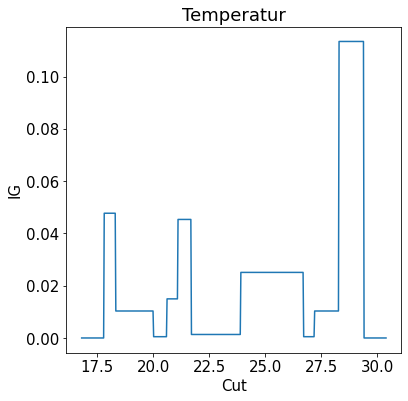

IG Werte: [0.      0.00049 0.00134 0.01032 0.01496 0.02508 0.04533 0.04771 0.1134 ]
Maximaler IG: 0.11340086
Bestes Schnittintervall: (28.3,29.4)
Y(X<=Cut): (True: 9 ; False: 4)
Y(X>Cut) : (True: 0 ; False: 1)




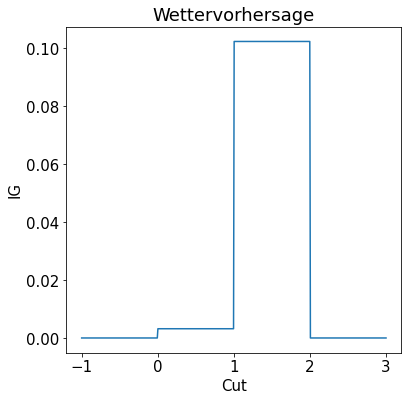

IG Werte: [0.      0.00318 0.10224]
Maximaler IG: 0.10224356
Bestes Schnittintervall: (1.0,2.0)
Y(X<=Cut): (True: 7 ; False: 2)
Y(X>Cut) : (True: 2 ; False: 3)




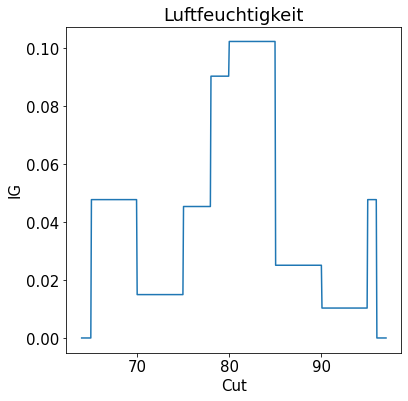

IG Werte: [0.      0.01032 0.01496 0.02508 0.04533 0.04771 0.09028 0.10224]
Maximaler IG: 0.10224356
Bestes Schnittintervall: (80.0,85.0)
Y(X<=Cut): (True: 7 ; False: 2)
Y(X>Cut) : (True: 2 ; False: 3)




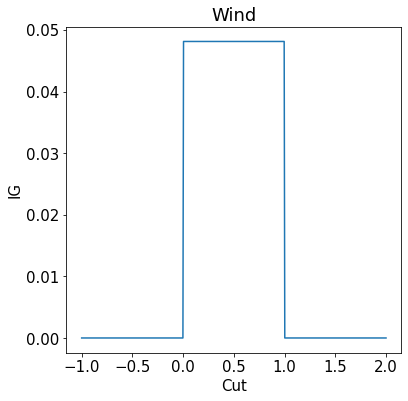

IG Werte: [0.      0.04813]
Maximaler IG: 0.04812703
Bestes Schnittintervall: (0.0,1.0)
Y(X<=Cut): (True: 6 ; False: 2)
Y(X>Cut) : (True: 3 ; False: 3)




In [13]:
for X_col in X_cols:
    # calculate all the information gains of a particular feature
    X = df[X_col]
    dX = 1
    cuts = np.linspace(X.min()-dX,X.max()+dX,500)
    IGs = np.zeros_like(cuts)
    for i,cut in enumerate(cuts):
        IGs[i] = IG(Y,X,cut)
    
    # plot the IG to the cuts
    plt.figure(figsize=(6,6))
    plt.title(X_col)
    plt.plot(cuts,IGs)
    plt.xlabel('Cut')
    plt.ylabel('IG')
    plt.show()
    
    # print the IG values
    with np.printoptions(precision=5):
        print(f'IG Werte: {np.unique(IGs)}')
    
    # print the best IG
    IG_max = np.max(np.unique(IGs))
    print(f'Maximaler IG: {IG_max:.8f}')
    
    # print the cut interval of the best IG
    IG_max_indices = np.where(IGs == IG_max)[0]
    min_cut = cuts[IG_max_indices[0]]
    max_cut = cuts[IG_max_indices[-1]]
    print(f'Bestes Schnittintervall: ({min_cut:.1f},{max_cut:.1f})')
    
    # print size of the target classes if the data was cut at the highes IG
    print(f'Y(X<=Cut): (True: {Y[X<=min_cut].sum()} ; False: {(~Y[X<=min_cut]).sum()})')
    print(f'Y(X>Cut) : (True: {Y[X>min_cut].sum()} ; False: {(~Y[X>min_cut]).sum()})')
    
    print('\n')

### d) Welches Attribut eignet sich am besten zum Trennen der Daten?

Den höchsten Informationsgewinn hat der Schnitt in der Temperatur.  
Aber hier wird nur ein Wert abgeschnitten und somit sollte nicht die Temperatur als erstes verwendet werden.

Knapp dahinter sind die Informationsgewinne bei Schnitt in der Wettervorhersage oder der Luftfeuchtigkeit.  
Beide Attribute schneiden den Datensatz genau gleich.  
Allerdings scheint die Verteilung der IGs der Luftfeuchtigkeit annähernd einer Normalverteilung zu folgen.
Also würden wir uns dazu entscheiden in der Luftfeuchtigkeit die erste Entscheidung zu setzen.